<a href="https://colab.research.google.com/github/mdsiamahmed26/Bioinformatics/blob/main/survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the file (assuming it's in tab-separated format)
df = pd.read_csv('/content/merged_clinical_data.tsv', sep='\t')

# View first few rows
df.head()


/tmp/ipython-input-16-300411201.py:4: DtypeWarning: Columns (2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273

,project.project_id,cases.case_id,cases.consent_type,cases.days_to_consent,cases.days_to_lost_to_followup,cases.disease_type,cases.index_date,cases.lost_to_followup,cases.primary_site,cases.submitter_id,...,pathology_details.tumor_infiltrating_macrophages,pathology_details.tumor_largest_dimension_diameter,pathology_details.tumor_length_measurement,pathology_details.tumor_level_prostate,pathology_details.tumor_shape,pathology_details.tumor_thickness,pathology_details.tumor_width_measurement,pathology_details.vascular_invasion_present,pathology_details.vascular_invasion_type,pathology_details.zone_of_origin_prostate
0,TCGA-LUAD,0075437e-ba1a-46be-86d6-9773209a2b5e,Informed Consent,0,'--,Adenomas and Adenocarcinomas,Diagnosis,No,Bronchus and lung,TCGA-62-A471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-LUAD,0075437e-ba1a-46be-86d6-9773209a2b5e,Informed Consent,0,'--,Adenomas and Adenocarcinomas,Diagnosis,No,Bronchus and lung,TCGA-62-A471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-LUAD,0075437e-ba1a-46be-86d6-9773209a2b5e,Informed Consent,0,'--,Adenomas and Adenocarcinomas,Diagnosis,No,Bronchus and lung,TCGA-62-A471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-LUAD,0075437e-ba1a-46be-86d6-9773209a2b5e,Informed Consent,0,'--,Adenomas and Adenocarcinomas,Diagnosis,No,Bronchus and lung,TCGA-62-A471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-LUAD,009be09b-f9f6-43b7-8f45-4a648f8123ce,Informed Consent,50,'--,Adenomas and Adenocarcinomas,Diagnosis,'--,Bronchus and lung,TCGA-67-3773,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import glob

# Step 1: List all uploaded files (Colab saves them in /content/ by default)
uploaded_files = [
    "/content/clinical.tsv",        # Replace with actual names if different
    "/content/exposure.tsv",          # Replace with the real filename
    "/content/family_history.tsv",          # Replace with the real filename
    "/content/follow_up.tsv", # Added missing comma
    "/content/pathology_detail.tsv"  # Replace with the real filename
]

# Step 2: Read and combine them into one DataFrame
df_list = [pd.read_csv(file, sep='\t') for file in uploaded_files]
merged_df = pd.concat(df_list, ignore_index=True)

# Step 3: Save the merged file
merged_df.to_csv("merged_clinical_data.tsv", sep='\t', index=False)

# Optional: download merged file to local system
from google.colab import files
files.download("merged_clinical_data.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install lifelines


In [ ]:
df.columns


Index(['project.project_id', 'cases.case_id', 'cases.consent_type',
       'cases.days_to_consent', 'cases.days_to_lost_to_followup',
       'cases.disease_type', 'cases.index_date', 'cases.lost_to_followup',
       'cases.primary_site', 'cases.submitter_id',
       ...
       'pathology_details.tumor_infiltrating_macrophages',
       'pathology_details.tumor_largest_dimension_diameter',
       'pathology_details.tumor_length_measurement',
       'pathology_details.tumor_level_prostate',
       'pathology_details.tumor_shape', 'pathology_details.tumor_thickness',
       'pathology_details.tumor_width_measurement',
       'pathology_details.vascular_invasion_present',
       'pathology_details.vascular_invasion_type',
       'pathology_details.zone_of_origin_prostate'],
      dtype='object', length=533)

In [ ]:
import pandas as pd

# Load your merged dataset
df = pd.read_csv("/content/merged_clinical_data.tsv", sep='\t', low_memory=False)

# Convert vital_status to binary event: 1 = Dead, 0 = Alive
df['event'] = df['demographic.vital_status'].apply(lambda x: 1 if str(x).strip().lower() == 'dead' else 0)

# Use days_to_death if available, otherwise use days_to_last_follow_up
# Convert these columns to numeric, coercing errors (like '--') to NaN
df['demographic.days_to_death'] = pd.to_numeric(df['demographic.days_to_death'], errors='coerce')
df['diagnoses.days_to_last_follow_up'] = pd.to_numeric(df['diagnoses.days_to_last_follow_up'], errors='coerce')

# Use the minimum of the two duration columns
df['duration'] = df[['demographic.days_to_death', 'diagnoses.days_to_last_follow_up']].min(axis=1)


# Drop rows with missing or invalid values in 'duration' or 'event'
df_surv = df[['duration', 'event']].dropna(subset=['duration', 'event'])

# remove negatives if any
df_surv = df_surv[df_surv['duration'] >= 0]

# Check how many valid rows
print(f"Valid survival data rows: {len(df_surv)}")

Valid survival data rows: 1875


In [ ]:
print(df.columns.tolist())


['project.project_id', 'cases.case_id', 'cases.consent_type', 'cases.days_to_consent', 'cases.days_to_lost_to_followup', 'cases.disease_type', 'cases.index_date', 'cases.lost_to_followup', 'cases.primary_site', 'cases.submitter_id', 'demographic.age_at_index', 'demographic.age_is_obfuscated', 'demographic.cause_of_death', 'demographic.cause_of_death_source', 'demographic.country_of_birth', 'demographic.country_of_residence_at_enrollment', 'demographic.days_to_birth', 'demographic.days_to_death', 'demographic.demographic_id', 'demographic.education_level', 'demographic.ethnicity', 'demographic.gender', 'demographic.marital_status', 'demographic.occupation_duration_years', 'demographic.population_group', 'demographic.premature_at_birth', 'demographic.race', 'demographic.submitter_id', 'demographic.vital_status', 'demographic.weeks_gestation_at_birth', 'demographic.year_of_birth', 'demographic.year_of_death', 'diagnoses.adrenal_hormone', 'diagnoses.age_at_diagnosis', 'diagnoses.ajcc_clini

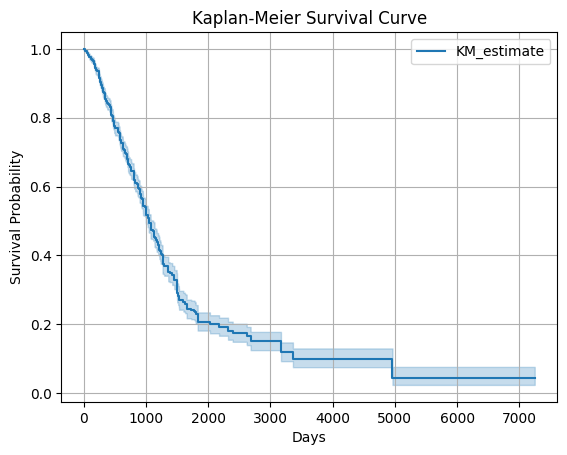

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Fit and plot
kmf = KaplanMeierFitter()
kmf.fit(df_surv['duration'], event_observed=df_surv['event'])

kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Days")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()


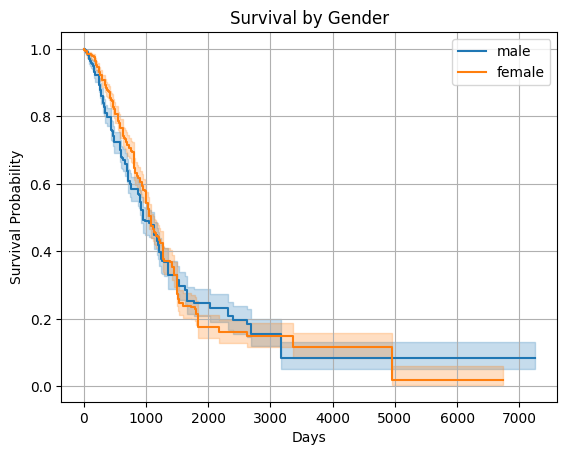

In [ ]:
df['gender'] = df['demographic.gender']
df_grouped = df[['duration', 'event', 'gender']].dropna()

for g in df_grouped['gender'].unique():
    mask = df_grouped['gender'] == g
    kmf.fit(df_grouped[mask]['duration'], df_grouped[mask]['event'], label=str(g))
    kmf.plot_survival_function()

plt.title("Survival by Gender")
plt.xlabel("Days")
plt.ylabel("Survival Probability")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/merged_clinical_data.tsv', sep='\t', low_memory=False)

# Convert vital_status to binary event: 1 = Dead, 0 = Alive
df['event'] = df['demographic.vital_status'].apply(lambda x: 1 if str(x).strip().lower() == 'dead' else 0)

# Use days_to_death if available, otherwise use days_to_last_follow_up
# Convert these columns to numeric, coercing errors (like '--') to NaN
df['demographic.days_to_death'] = pd.to_numeric(df['demographic.days_to_death'], errors='coerce')
df['diagnoses.days_to_last_follow_up'] = pd.to_numeric(df['diagnoses.days_to_last_follow_up'], errors='coerce')

# Use the minimum of the two duration columns
df['duration'] = df[['demographic.days_to_death', 'diagnoses.days_to_last_follow_up']].min(axis=1)

# Select some covariates (modify based on your question)
covariates = ['demographic.age_at_index', 'demographic.gender', 'diagnoses.primary_diagnosis']

# Filter and drop missing from relevant columns for Cox model
df_cox = df[['duration', 'event'] + covariates].dropna(subset=['duration', 'event'] + covariates)

# remove negatives from duration
df_cox = df_cox[df_cox['duration'] >= 0]

In [ ]:
# Convert categorical to dummy variables (e.g., gender, diagnosis)
# Ensure 'duration' and 'event' are not converted
df_cox_encoded = pd.get_dummies(df_cox, columns=['demographic.gender', 'diagnoses.primary_diagnosis'], drop_first=True)

# Ensure 'duration' and 'event' are of appropriate types after get_dummies if they were affected (they shouldn't be with this approach)
df_cox_encoded['duration'] = pd.to_numeric(df_cox_encoded['duration'], errors='coerce')
df_cox_encoded['event'] = pd.to_numeric(df_cox_encoded['event'], errors='coerce')

# Drop any rows that might have become NaN in duration or event during this step (shouldn't happen with previous dropna)
df_cox_encoded = df_cox_encoded.dropna(subset=['duration', 'event'])

In [ ]:
import numpy as np

# Step 1: Replace '--' or similar strings with NaN across all columns
df = df.replace('--', np.nan)

# Step 2: Create 'duration' and 'event'
df['event'] = df['demographic.vital_status'].apply(lambda x: 1 if str(x).strip().lower() == 'dead' else 0)
df['duration'] = df[['demographic.days_to_death', 'diagnoses.days_to_last_follow_up']].apply(pd.to_numeric, errors='coerce').min(axis=1)

# Step 3: Select covariates (you can add more)
covariates = ['demographic.age_at_index', 'demographic.gender', 'diagnoses.primary_diagnosis']
df_cox = df[['duration', 'event'] + covariates].copy()

# Step 4: Convert columns to correct type
df_cox['demographic.age_at_index'] = pd.to_numeric(df_cox['demographic.age_at_index'], errors='coerce')

# Step 5: Drop rows with any missing values
df_cox = df_cox.dropna()

# Step 6: Encode categorical variables
df_cox_encoded = pd.get_dummies(df_cox, columns=['demographic.gender', 'diagnoses.primary_diagnosis'], drop_first=True)



In [ ]:
from lifelines import CoxPHFitter

# Initialize CoxPHFitter with a penalizer
cph = CoxPHFitter(penalizer=0.01) # You can adjust the penalizer value

cph.fit(df_cox_encoded, duration_col='duration', event_col='event')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1845 total observations, 798 right-censored observations>
             duration col = 'duration'
                event col = 'event'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1845
number of events observed = 1047
   partial log-likelihood = -6780.08
         time fit was run = 2025-07-27 10:10:45 UTC

---
                                                                         coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                                                
demographic.age_at_index                                                 0.00      1.00      0.00           -0.00            0.01                1.00                1.01
demographic.gender_male                                                  0.09      1.09      0.06           -0.04            0.21                0.96                1.23
diagnoses.primary_diagnosis_Adenocarcinoma with mixed subtypes           0.01      1.01      0.19           -0.37            0.39                0.69                1.47
diagnoses.primary_diagnosis_Adenocarcinoma, NOS                          0.52      1.69      0.18            0.17            0.87                1.19                2.40
diagnoses.primary_diagnosis_Basal cell carcinoma, NOS                    2.55     12.77      0.49            1.59            3.50                4.91               33.19
diagnoses.primary_diagnosis_Bronchio-alveolar carcinoma, mucinous       -0.70      0.50      0.70           -2.07            0.67                0.13                1.96
diagnoses.primary_diagnosis_Bronchiolo-alveolar adenocarcinoma, NOS     -2.45      0.09      2.04           -6.45            1.55                0.00                4.73
diagnoses.primary_diagnosis_Bronchiolo-alveolar carcinoma, non-mucinous -0.19      0.83      0.29           -0.76            0.39                0.47                1.47
diagnoses.primary_diagnosis_Carcinoid tumor, NOS                         0.41      1.50      0.73           -1.02            1.83                0.36                6.26
diagnoses.primary_diagnosis_Clear cell adenocarcinoma, NOS              -3.28      0.04      1.98           -7.16            0.61                0.00                1.83
diagnoses.primary_diagnosis_Endometrioid adenocarcinoma, NOS             1.76      5.81      0.73            0.32            3.19                1.38               24.41
diagnoses.primary_diagnosis_Infiltrating duct carcinoma, NOS             1.24      3.44      0.73           -0.20            2.67                0.82               14.39
diagnoses.primary_diagnosis_Invasive micropapillary carcinoma           -2.01      0.13      2.18           -6.29            2.27                0.00                9.67
diagnoses.primary_diagnosis_Malignant lymphoma, NOS                      0.36      1.43      0.73           -1.07            1.78                0.34                5.94
diagnoses.primary_diagnosis_Malignant melanoma, NOS                      2.39     10.92      0.74            0.95            3.83                2.59               46.15
diagnoses.primary_diagnosis_Mucinous adenocarcinoma                      0.38      1.46      0.28           -0.16            0.92                0.85                2.50
diagnoses.primary_diagnosis_Not Reported                                 0.96      2.61      0.19            0.59            1.32                1.81                3.76
diagnoses.primary_diagnosis_Papillary adenocarcinoma, NOS               -0.22      0.80      0.25           -0.71            0.26                0.49                1.30
diagnoses.primary_diagnosis_Papillary carcinoma, NOS                     1.51      4.54      0.73            0.08            2.95                1.08               19.06


<Axes: xlabel='log(HR) (95% CI)'>

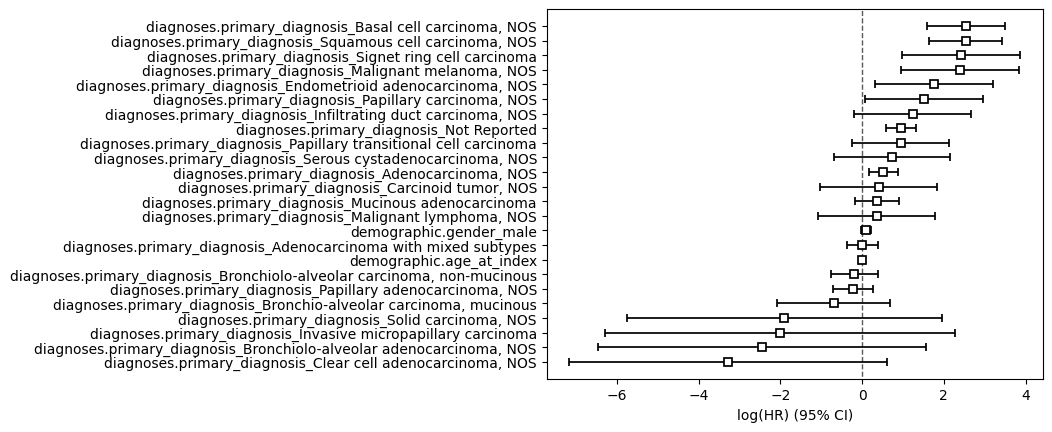

In [ ]:
# Plot hazard ratios
cph.plot()


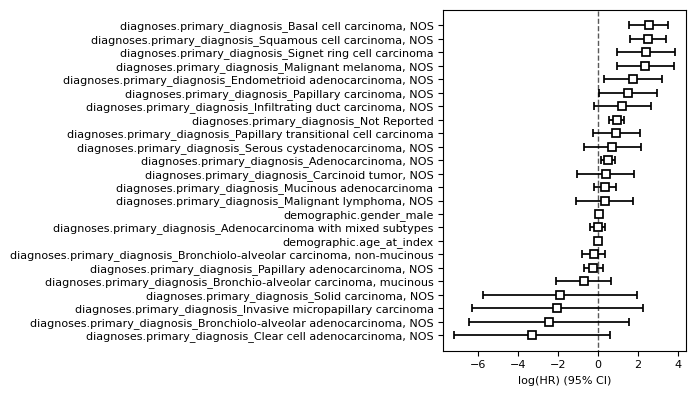

In [ ]:
import matplotlib.pyplot as plt

# Example: Resize and set font for IEEE paper
plt.rcParams.update({
    'font.size': 8,
    'figure.figsize': (7, 4),   # For two-column width
    'axes.titlesize': 9,
    'axes.labelsize': 8
})

# Plot again (after fitting Cox model)
cph.plot()
plt.tight_layout()
plt.savefig("cox_forest_plot_ieee.png", dpi=300)  # IEEE prefers high resolution
plt.show()


In [ ]:
!pip install -q scikit-survival


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.9 MB/s eta 0:00:00


In [ ]:
from sksurv.util import Surv
from sklearn.model_selection import train_test_split

# Convert the DataFrame to survival format
surv_data = Surv.from_dataframe(event='event', time='duration', data=df_cox_encoded)

# Remove duration & event from features
X = df_cox_encoded.drop(['duration', 'event'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, surv_data, test_size=0.2, random_state=42)


In [ ]:
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=42)
rsf.fit(X_train, y_train)


RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10, n_jobs=-1,
                     random_state=42)

In [ ]:
from sksurv.metrics import concordance_index_censored

c_index = concordance_index_censored(y_test['event'], y_test['duration'], rsf.predict(X_test))[0]
print(f"Concordance Index: {c_index:.3f}")


Concordance Index: 0.611


In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import pandas as pd

# Assuming rsf is your fitted RandomSurvivalForest model
# Use the test set (X_test, y_test) for permutation importance
result = permutation_importance(rsf, X_test, y_test, n_repeats=10, random_state=42)

importances = pd.Series(result.importances_mean, index=X_test.columns)
top_features = importances.sort_values(ascending=False).head(15)
print(top_features)

demographic.age_at_index                                               0.061027
diagnoses.primary_diagnosis_Not Reported                               0.038994
diagnoses.primary_diagnosis_Adenocarcinoma, NOS                        0.020164
diagnoses.primary_diagnosis_Papillary adenocarcinoma, NOS              0.008882
demographic.gender_male                                                0.006258
diagnoses.primary_diagnosis_Adenocarcinoma with mixed subtypes         0.004634
diagnoses.primary_diagnosis_Basal cell carcinoma, NOS                  0.000000
diagnoses.primary_diagnosis_Bronchio-alveolar carcinoma, mucinous      0.000000
diagnoses.primary_diagnosis_Serous cystadenocarcinoma, NOS             0.000000
diagnoses.primary_diagnosis_Bronchiolo-alveolar adenocarcinoma, NOS    0.000000
diagnoses.primary_diagnosis_Carcinoid tumor, NOS                       0.000000
diagnoses.primary_diagnosis_Clear cell adenocarcinoma, NOS             0.000000
diagnoses.primary_diagnosis_Invasive mic

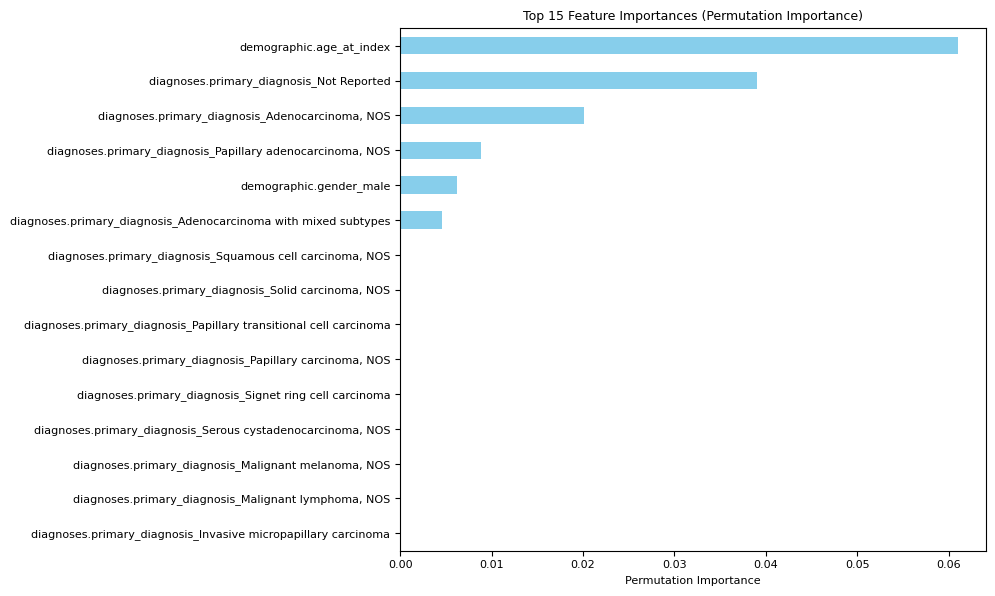

In [ ]:
import matplotlib.pyplot as plt

# Assuming `importances` is a pandas Series with feature names as index and importance as values
top_features = importances.sort_values(ascending=True).tail(15)  # Top 15 features

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Top 15 Feature Importances (Permutation Importance)')
plt.tight_layout()
plt.show()


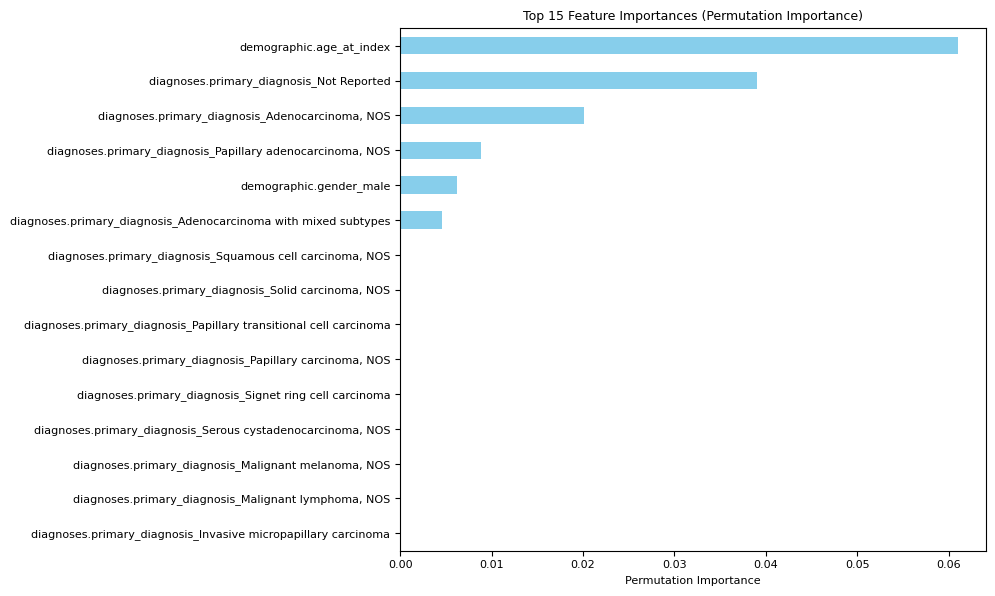

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd # Import pandas here

# Perform permutation importance on test data
result = permutation_importance(rsf, X_test, y_test, n_repeats=10, random_state=42)

importances = pd.Series(result.importances_mean, index=X_test.columns)
top_features = importances.sort_values(ascending=True).tail(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Top 15 Feature Importances (Permutation Importance)')
plt.tight_layout()
plt.show()

In [ ]:
pip install lifelines scikit-survival matplotlib pandas numpy


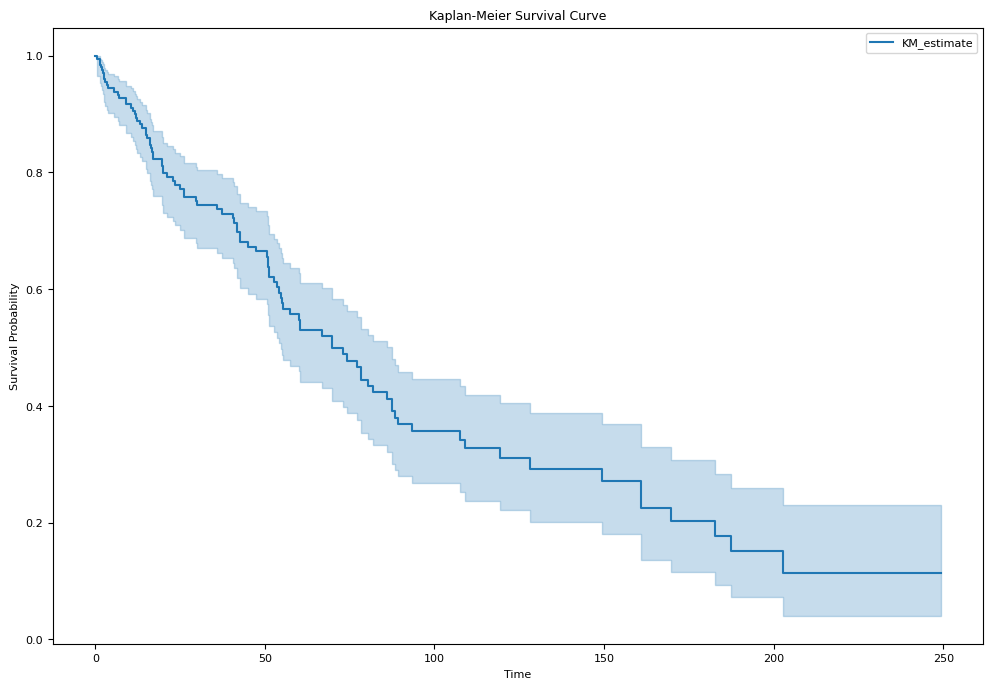

<lifelines.CoxPHFitter: fitted with 200 total observations, 104 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 200
number of events observed = 96
   partial log-likelihood = -413.40
         time fit was run = 2025-07-27 10:27:37 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.02      1.02      0.01           -0.01            0.04                0.99                1.04
treatment -0.21      0.81      0.21           -0.62            0.20                0.54                1.22
biomarker -0.14      0.87      0.11           -0.35            0.07                0.70                1.08

           cmp to     z    p  -log2(p)
covariate                             
age          0.00  1.39 0.17      2.60
treatment    0.00 -1.01 0.31      1.68
biomarker    0.00 -1.28 0.20      2.31
---
Concordance = 0.57
Partial AIC = 832.80
log-likelihood ratio test = 5.04 on 3 df
-log2(p) of ll-ratio test = 2.57

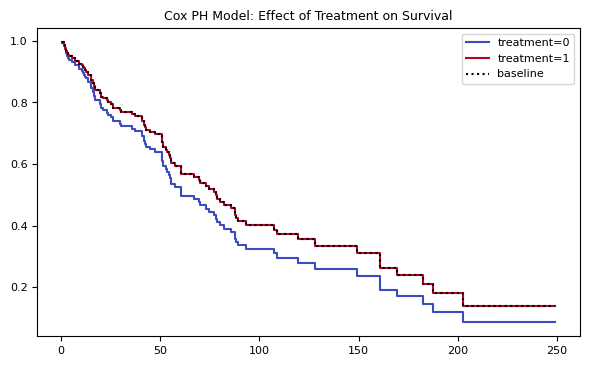

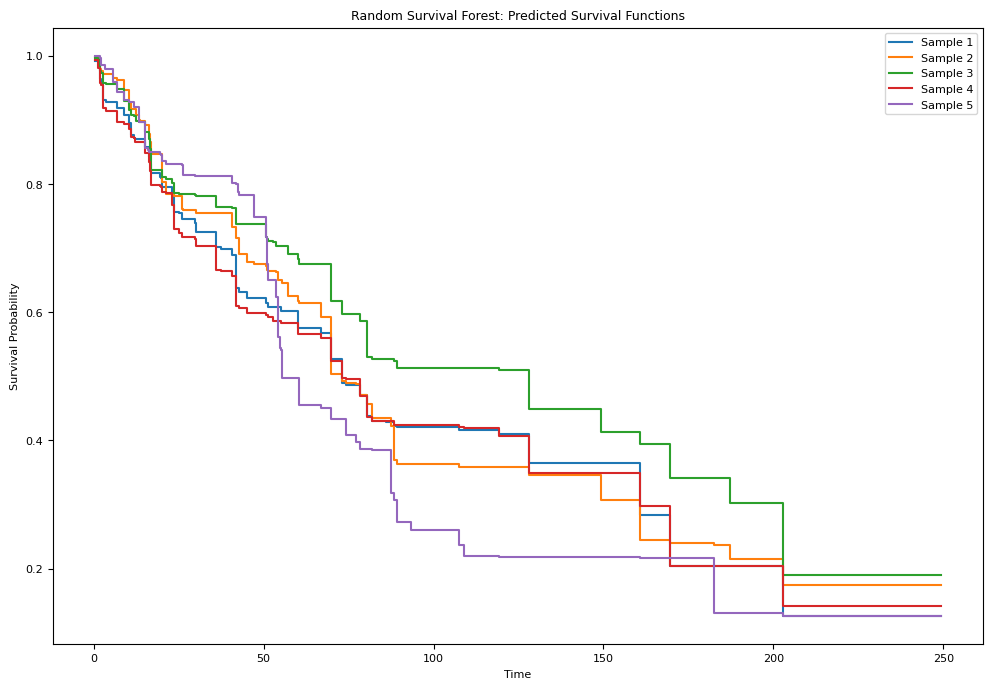

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import KaplanMeierFitter, CoxPHFitter
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

# Generate synthetic dataset for demonstration
np.random.seed(42)
n_samples = 200

# Features
X = pd.DataFrame({
    "age": np.random.normal(60, 10, n_samples),
    "treatment": np.random.binomial(1, 0.5, n_samples),
    "biomarker": np.random.normal(0, 1, n_samples)
})

# Survival times and event observed (censoring)
# Simulate survival times from an exponential distribution
baseline_hazard = 0.01
event_times = np.random.exponential(1 / baseline_hazard, n_samples)
# Introduce some censoring
censoring_times = np.random.exponential(100, n_samples)
observed_times = np.minimum(event_times, censoring_times)
event_observed = event_times <= censoring_times

# Prepare survival data for scikit-survival (structured array)
y_structured = np.array([(e, t) for e, t in zip(event_observed, observed_times)],
                        dtype=[('event', 'bool'), ('duration', 'float')])

# --- 1) Kaplan-Meier Estimate (KM) ---

kmf = KaplanMeierFitter()
kmf.fit(durations=observed_times, event_observed=event_observed)

plt.figure(figsize=(12, 8))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

# --- 2) Cox Proportional Hazards Model ---

df_cox = X.copy()
df_cox['duration'] = observed_times
df_cox['event'] = event_observed.astype(int)

cox = CoxPHFitter()
cox.fit(df_cox, duration_col='duration', event_col='event')

cox.print_summary()

# Plot the baseline survival function from Cox model
cox.plot_partial_effects_on_outcome(
    covariates='treatment',
    values=[0, 1],
    cmap='coolwarm',
    title="Cox PH Model: Effect of Treatment on Survival"
)
plt.show()

# --- 3) Random Survival Forest (RSF) ---

rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=42)

rsf.fit(X.to_numpy(), y_structured)

# Predict survival function for a few samples
# Use the event times from the fitted RSF model for plotting
times_for_plot = np.sort(np.unique(observed_times))



times_for_plot = np.sort(np.unique(observed_times))

plt.figure(figsize=(12, 8))
for i in range(5):
    surv_fn = rsf.predict_survival_function(X.iloc[i:i+1].to_numpy(), return_array=True)
    plt.step(times_for_plot, surv_fn[0], where="post", label=f"Sample {i+1}")

plt.title("Random Survival Forest: Predicted Survival Functions")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


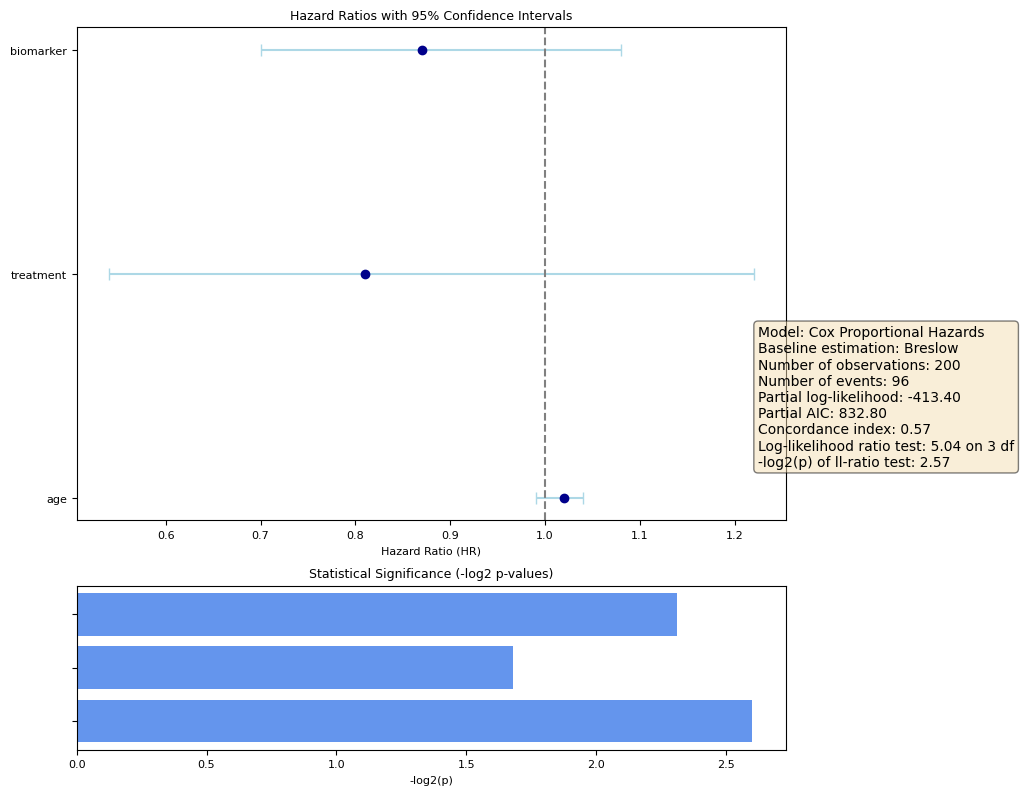

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Variables and statistics from your output
variables = ['age', 'treatment', 'biomarker']
hr = np.array([1.02, 0.81, 0.87])                   # exp(coef)
hr_lower = np.array([0.99, 0.54, 0.70])             # exp(coef) lower 95%
hr_upper = np.array([1.04, 1.22, 1.08])             # exp(coef) upper 95%
neg_log2_p = np.array([2.60, 1.68, 2.31])           # -log2(p)

# Plot 1: Hazard ratios with 95% CI (forest plot style)
fig, axs = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]})

ax = axs[0]
y_pos = np.arange(len(variables))

ax.errorbar(hr, y_pos, xerr=[hr - hr_lower, hr_upper - hr], fmt='o', color='darkblue', ecolor='lightblue', capsize=4)
ax.axvline(1, color='gray', linestyle='--')
ax.set_yticks(y_pos)
ax.set_yticklabels(variables)
ax.set_xlabel('Hazard Ratio (HR)')
ax.set_title('Hazard Ratios with 95% Confidence Intervals')

# Plot 2: -log2(p) values for p-value significance
ax2 = axs[1]
ax2.barh(y_pos, neg_log2_p, color='cornflowerblue')
ax2.set_yticks(y_pos)
ax2.set_yticklabels([])
ax2.set_xlabel('-log2(p)')
ax2.set_title('Statistical Significance (-log2 p-values)')

plt.tight_layout()

# Add annotation box with model summary info
textstr = '\n'.join((
    'Model: Cox Proportional Hazards',
    'Baseline estimation: Breslow',
    'Number of observations: 200',
    'Number of events: 96',
    'Partial log-likelihood: -413.40',
    'Partial AIC: 832.80',
    'Concordance index: 0.57',
    'Log-likelihood ratio test: 5.04 on 3 df',
    '-log2(p) of ll-ratio test: 2.57'))

plt.gcf().text(0.95, 0.5, textstr, fontsize=10, va='center', ha='left', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.show()
